## King County Ev Fiyat Tahmin

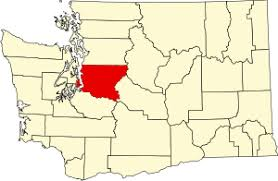

Bu çalışma Washington KC deki ev fiyatlarını tahminleyen bir model oluşturuldu.

Veri Seti: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

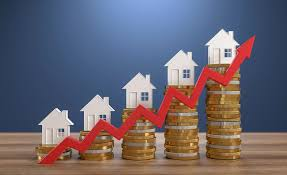

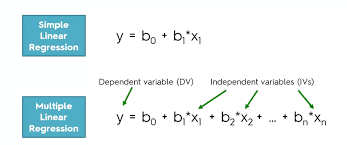

# Veri Seti Açıklaması

Bu veri seti, Seattle'ı içeren King County için ev satış fiyatlarını içermektedir. Mayıs 2014 ile Mayıs 2015 arasında satılan evleri kapsar.

Basit regresyon modellerini değerlendirmek için harika bir veri setidir.

## Veri Sözlüğü

- **id**: Bir ev için id no
- **date**: Evin satıldığı tarih
- **price**: Fiyat, [tahmin hedefi, y]
- **bedrooms**: Yatak odası sayısı
- **bathrooms**: Banyo sayısı/yatak odası
- **sqft_living**: Evdeki alanın metrekare cinsinden büyüklüğü
- **sqft_lot**: Arsanın metrekare cinsinden büyüklüğü
- **floors**: Evdeki toplam kat sayısı
- **waterfront**: Su manzaralı ev
- **view**: Manzara
- **condition**: Genel olarak evin durumu ne kadar iyi
- **grade**: King County derecelendirme sistemi temelinde konut birimine verilen genel derece
- **sqft_above**: Bodrum hariç evin metrekare cinsinden büyüklüğü
- **sqft_basement**: Bodrumun metrekare cinsinden büyüklüğü
- **yr_built**: Yapım yılı
- **yr_renovated**: Restorasyon yılı
- **zipcode**: Posta kodu
- **lat**: Enlem koordinatı
- **long**: Boylam koordinatı
- **sqft_living15**: 2015 yılında oturma odası alanı (bazı yenilemeleri ima eder). Bu, arsa büyüklüğü alanını etkilemiş olabilir veya olmayabilir.
- **sqft_lot15**: 2015 yılında arsa büyüklüğü (bazı yenilemeleri ima eder).

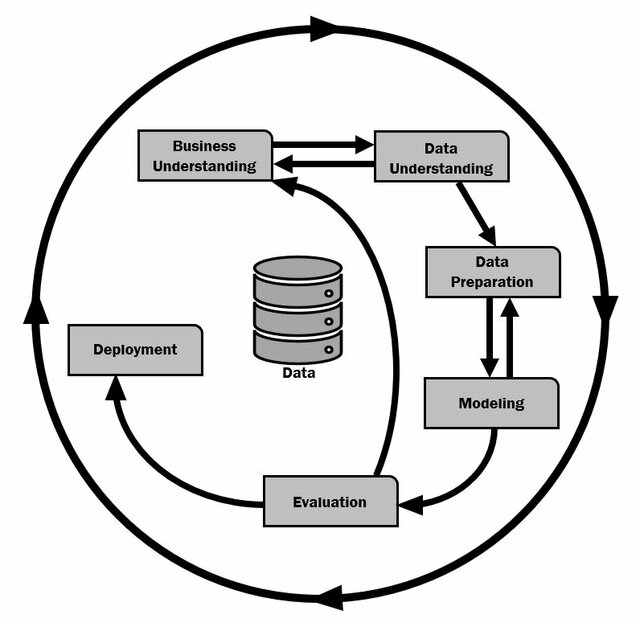

## 1. Kütüphanelerin Yüklenmesi

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

## 2. Veri Setinin Yüklenmesi

In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3073-49B7

 Directory of C:\Users\murat\Documents\BTKNov24\G5

09.11.2024  16:08    <DIR>          .
09.11.2024  10:42    <DIR>          ..
09.11.2024  15:59    <DIR>          .ipynb_checkpoints
09.11.2024  12:07    <DIR>          .venv
09.11.2024  15:57             4.063 advertising.csv
09.11.2024  12:53             2.043 app.py
09.11.2024  11:19               755 Finans Streamlit Aray�z.ipynb
09.11.2024  11:16           406.476 Finans Verileri €ekmek.ipynb
09.11.2024  16:08           391.725 KC Ev Fiyatlar�.ipynb
09.11.2024  15:57         2.515.206 kc_house_data.csv
09.11.2024  14:36               590 regresyon.ipynb
09.11.2024  12:56                41 requirements.txt
09.11.2024  15:40    <DIR>          TM_uyg
               8 File(s)      3.320.899 bytes
               5 Dir(s)  44.212.273.152 bytes free


In [7]:
df=pd.read_csv("kc_house_data.csv")

## 3. Veri Ön İşleme

## Exploratory Data Analysis (Keşifsel Veri Analizi)

In [8]:
#pandas tüm sütunları gçster
pd.set_option("display.max_columns",None)

In [9]:
#veriye gözat
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
#veri hakkında bilgi al
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
# veri setini incele
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [12]:
#maximum yatak odası sayısı
df['bedrooms'].max()

33

<Axes: ylabel='Frequency'>

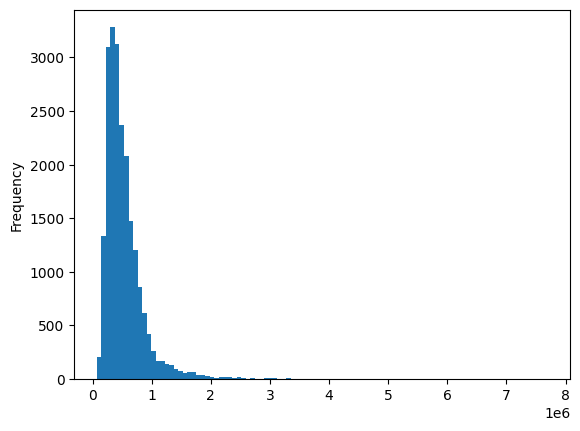

In [13]:
df.price.plot(kind='hist',bins=100)

In [15]:
df[df['price']==df['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


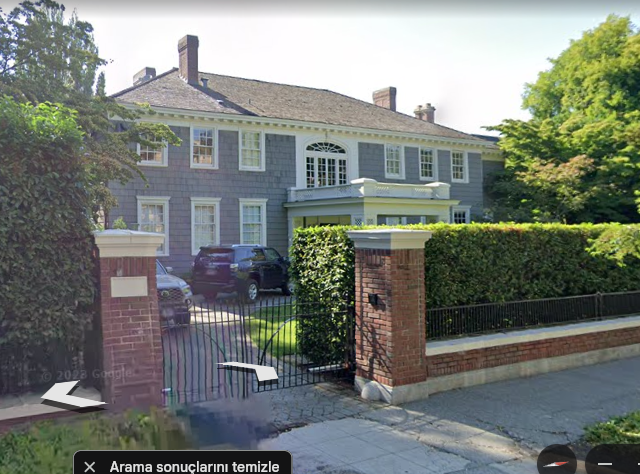

https://earth.google.com/web/search/47.6298%09-122.323/@47.6300047,-122.32265511,103.20149216a,1577.48762329d,35y,0h,0t,0r/data=ClgaKhIkGamCUUmd0EdAIekmMQislF7AKhA0Ny42Mjk4CS0xMjIuMzIzGAIgASImCiQJy14Q2_J2NEARyl4Q2_J2NMAZyGHoAQRxRUAhJjCooZabTcBCAggBOgMKATBCAggASg0I__ARAA

In [17]:
#veri setinin şekli  satır*sütun
df.shape

(21613, 21)

## Korelasyon

In [19]:
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [18]:
df2=df.copy()